<a href="https://colab.research.google.com/github/markdevine/ET5003_SEM1_2021-2/blob/main/ET5003_KaggleCompetition_MarkDevine_19187289.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**
##ET5003 - MACHINE LEARNING APPLICATIONS 

###Instructor: Enrique Naredo
###ET5003_KaggleCompetition

In [1]:
#@title Current Date
Today = '2021-10-16' #@param {type:"date"}


In [2]:
#@markdown ---
#@markdown ### Enter your details here:
Student_ID = "19187289" #@param {type:"string"}
Student_full_name = "Mark Devine" #@param {type:"string"}
#@markdown ---

In [3]:
#@title Notebook information
Notebook_type = 'Etivity' #@param ["Example", "Lab", "Practice", "Etivity", "Assignment", "Exam"]
Version = 'Draft' #@param ["Draft", "Final"] {type:"raw"}
Submission = False #@param {type:"boolean"}

# INTRODUCTION

The approach is to conduct exploratory data analysis, data cleaning and preperation, before applying the natural language processing techniques presented in the module for the purposes of house price prediction.

Then apply Bayesian Neural Networks on the same set of data again for the purpose of house price prediction.

Compare the models results for accuracy levels.

***The goal is to use advanced Machine Learning methods to predict House price.***

## Imports

In [4]:
# suppressing warnings:
import warnings
warnings.filterwarnings("ignore")

In [5]:
# expand the display of the notebook when run
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [6]:
# standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
# to plot
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D

# to generate classification, regression and clustering datasets
import sklearn.datasets as dt

# to create data frames
from pandas import DataFrame

# to generate data from an existing dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

In [8]:
# Scikit-learn is an open source machine learning library 
# that supports supervised and unsupervised learning
# (https://scikit-learn.org/stable/)
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [9]:
# Regular expression operations
#https://docs.python.org/3/library/re.html
import re 

# Natural Language Toolkit
# https://www.nltk.org/install.html
import nltk

# Stemming maps different forms of the same word to a common “stem” 
# https://pypi.org/project/snowballstemmer/
from nltk.stem import SnowballStemmer

# https://www.nltk.org/book/ch02.html
from nltk.corpus import stopwords

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

In [10]:
!pip install gpy

In [11]:
import GPy as GPy
import numpy as np
import pylab as pb
import pymc3 as pm
import arviz as az

In [12]:
# Define the seed so that results can be reproduced
seed = 11
rand_state = 11

# Define the color maps for plots
color_map = plt.cm.get_cmap('RdYlBu')
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","cyan","magenta","blue"])

In [13]:
# display complete contents and information of a dataframe without any kind of truncation (https://thispointer.com/python-pandas-how-to-display-full-dataframe-i-e-print-all-rows-columns-without-truncation/)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

# DATASET

Extract from this [paper](https://ieeexplore.ieee.org/document/9300074):

* House prices are a significant impression of the economy, and its value ranges are of great concerns for the clients and property dealers. 

* Housing price escalate every year that eventually reinforced the need of strategy or technique that could predict house prices in future. 

* There are certain factors that influence house prices including physical conditions, locations, number of bedrooms and others.


1. [Download the dataset](https://github.com/UL-CS6134/CS6134_SEM1_2021-2/tree/main/Week-5). 

2. Upload the dataset into your folder.



The challenge is to predict the final price of each house.

### Loading the housing price dataset

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
# Path, copy the path from your Drive
path = '/content/drive/MyDrive/Colab Notebooks/Data/Kaggle/'

# Housing Price Data
train_data = path + 'HousePrice_Train.csv'
test_data = path + 'HousePrice_Test.csv'

# train data
df_train = pd.read_csv(train_data)

# test data
df_test = pd.read_csv(test_data)

# check how many instances we have in each dataset
print('Training dataset shape is {} '.format(df_train.shape))
print('Test dataset shape is {} '.format(df_test.shape))

Training dataset shape is (1638, 14) 
Test dataset shape is (702, 13) 


## Training & Test Data

In [16]:
# split data into training and test
from sklearn.model_selection import train_test_split

# training: 70% (0.7), test: 30% (0.3) 
# you could try any other combination 
# but consider 50% of training as the low boundary
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

### Exploratory Data Analysis and dataset preperation

### Exploratory Data Analysis and dataset preperation

1.   Training dataset
2.   Test dataset



In [17]:
# show the first data frame row in the training dataset
df_train.head(1)

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface,Price
0,1,12409116,Ongar,2,2,C3,"DNG are delighted to present to the market no. 5 Chipping Row. This two bedroom apartment comes to the market in excellent condition throughout. Viewers will be sure to see the meticulous care and attention the home owner has for this property. \n\r\nThis well-presented apartment comprises of an open plan living and dining room, kitchen, two spacious double bedrooms the master benefitting from the a large en-suite and an extensively tiled bathroom. This property benefits from own door access, designated car parking and a quiet and private location.\n\r\nChipping Row is well serviced by excellent public transport links to Dublin City centre. Dublin Airport, N3 / M3 and M50 are all within an easy reach. Local primary and secondary schools, Blanchardstown Shopping Centre are all within driving distance. Ongar village and all it has to offer including supermarket, restaurants, shops and pharmacy€TM is only a short walk away.\n\r\nViewing comes highly recommended.\n\r\nFeatures:\r\nGround floor two bedroom apartment\r\n67 sqm / 721 sqft\r\nBuilt c. 2005\r\nDouble glazed windows throughout\r\nElectric heating\r\nOwn door access\r\nDesignated and visitor car parking \r\nManagement fee €"" approx. €760\r\nManagement Company €"" CORE\n\n\r\nAccommodation\r\nLiving/dining room 5.2m x 3.3m\r\nLaminate flooring, feature fireplace, large window to the front of the property.\r\nKitchen 3.4m x 1\r\nLaminate flooring, wall and floor fitted kitchen units, plumbed for washing machine. \r\nBedroom 1 5.1m x 2.2m\r\nLarge double bedroom, fitted wardrobes, ample storage space, en-suite off.\r\nEn-suite 2.5m x 1.6m\r\nExtensively tiled, shower, whb, wc.\r\nBedroom 2 3.7m x 2.7m\r\nLarge double bedroom, fitted wardrobes, ample storage space.\r\nBathroom 2.5m x 1.7m\r\nExtensively tiled, bath with over-head shower, whb, wc.",NaN,None,53.396659,-6.438791,apartment,67.0,195000


In [18]:
# generate descriptive statistics
df_train.describe()

,Index,ID,Num_Bathrooms,Num_Beds,Latitude,Longitude,Surface,Price
count,1638.000000,1.638000e+03,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000,1.638000e+03
mean,819.500000,1.231930e+07,2.054335,3.043346,53.350473,-6.255086,169.540695,5.547196e+05
std,472.994186,1.447540e+05,1.241259,1.379650,0.076832,0.144430,1791.793934,5.652032e+05
min,1.000000,1.118567e+07,1.000000,1.000000,52.501856,-6.497000,3.400000,1.999500e+04
25%,410.250000,1.228104e+07,1.000000,2.000000,53.294261,-6.309613,73.000000,2.950000e+05
50%,819.500000,1.238055e+07,2.000000,3.000000,53.341386,-6.247780,97.050000,3.950000e+05
75%,1228.750000,1.240548e+07,3.000000,4.000000,53.382031,-6.193982,135.000000,5.950000e+05
max,1638.000000,1.242836e+07,18.000000,27.000000,53.630588,-1.744995,72236.387140,8.900000e+06


In [19]:
# show first data frame row in the test dataset
df_test.head(1)

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface
0,1639,12292473,Milltown,2,2,C2,"OMD Estate Agents are delighted to present this 2 bed townhouse situated in this well sought after location. The property is presented in immaculate condition and is conveniently located within a short stroll of Milltown, Ranelagh and Donnybrook villages. \r\nThe accommodation comprises of 2 double bedrooms, both rooms with built in wardrobes and family bathroom. Downstairs consists of good sized living area with stove fire, under stairs storage room, kitchen/ dining room with all integrated goods and w.c. There is a sunny paved terrace to the rear.\n\r\nIt has O.F.C.H, PVC double glazing throughout, designated parking space. Local amenities include Luas, bus routes, shops, Wilde and Green, David Lloyd Riverview gym, restaurants, bars and U.C.D.\n\r\nLiving Room 4.46m x 3.56m\r\nKitchen 4.00m x 3.65m\r\nW.c 1.65m x 1.90m\r\nBed 1) 3.11m x 3.53m\r\nBed 2) 2.63m x 3.54m\r\nBathroom 2.68m x 1.43m\r\nLanding 2.57m x .82m","Parking,Oil Fired Central Heating","Designated parking spaces\nPresented in pristine condition\nPVC double glazing throughout\nO.F.C.H\nSunny terrace\nManagement fees €1,300 per annum.\n",53.316269,-6.243391,townhouse,65.0


In [20]:
# generate descriptive statistics
df_test.describe()

,Index,ID,Num_Bathrooms,Num_Beds,Latitude,Longitude,Surface
count,702.000000,7.020000e+02,702.000000,702.000000,702.000000,702.000000,702.000000
mean,1989.500000,1.231545e+07,2.027066,2.987179,53.350445,-6.252411,132.603530
std,202.794231,1.420680e+05,1.071273,1.198480,0.073961,0.091600,330.347066
min,1639.000000,1.147889e+07,1.000000,1.000000,53.214227,-6.521183,32.100000
25%,1814.250000,1.227637e+07,1.000000,2.000000,53.295225,-6.304258,73.000000
50%,1989.500000,1.237928e+07,2.000000,3.000000,53.341153,-6.247799,99.200000
75%,2164.750000,1.240421e+07,3.000000,4.000000,53.381752,-6.184277,136.875000
max,2340.000000,1.242824e+07,9.000000,14.000000,53.617443,-6.057150,8576.000000


In [21]:
# calculate the number of unique values in each column of the dataframe
nunique = df_train.nunique()
print(nunique)

Index            1638
ID               1638
Location         142 
Num_Bathrooms    11  
Num_Beds         11  
BER_class        16  
Description      1638
Services         31  
Features         1118
Latitude         1604
Longitude        1605
Type             10  
Surface          666 
Price            267 
dtype: int64


There are no unique values for any of the features.

In [22]:
# let's check the missing values in the training dataset across the attributes as a percentage (https://medium.com/dunder-data/finding-the-percentage-of-missing-values-in-a-pandas-dataframe-a04fa00f84ab)
df_train.isna().mean().round(4) * 100

Index            0.00 
ID               0.00 
Location         0.00 
Num_Bathrooms    0.00 
Num_Beds         0.00 
BER_class        15.32
Description      0.00 
Services         64.77
Features         0.00 
Latitude         0.00 
Longitude        0.00 
Type             0.00 
Surface          0.00 
Price            0.00 
dtype: float64

In [23]:
# let's check the missing values in the test dataset across the attributes as a percentage (https://medium.com/dunder-data/finding-the-percentage-of-missing-values-in-a-pandas-dataframe-a04fa00f84ab)
df_test.isna().mean().round(4) * 100

Index            0.00 
ID               0.00 
Location         0.00 
Num_Bathrooms    0.00 
Num_Beds         0.00 
BER_class        15.38
Description      0.00 
Services         64.96
Features         0.00 
Latitude         0.00 
Longitude        0.00 
Type             0.00 
Surface          0.00 
dtype: float64

The dataset is mostly complete so we replace the missing values in the BER_class feature with the median value. 

The fact that the Services feature has 65% missing values doesn't matter as I intend on combining the test features, Description, Services and Features for the NLP. It probably won't add much value but let's keep it for the instances that have it.

In [24]:
# let's check the BER_class values
print(df_train['BER_class'].sort_values().unique())
print(df_test['BER_class'].sort_values().unique())

['A1' 'A2' 'A3' 'B1' 'B2' 'B3' 'C1' 'C2' 'C3' 'D1' 'D2' 'E1' 'E2' 'F' 'G'
 'SINo666of2006exempt' nan]
['A2' 'A3' 'B1' 'B2' 'B3' 'C1' 'C2' 'C3' 'D1' 'D2' 'E1' 'E2' 'F' 'G'
 'SINo666of2006exempt' nan]


In [25]:
# let's check the BER_class values for NaNs in the training dataset
df_train.BER_class.drop_duplicates()

0      C3                 
1      D1                 
2      A3                 
3      E1                 
7      NaN                
10     G                  
11     E2                 
15     C2                 
16     SINo666of2006exempt
19     F                  
24     B2                 
27     C1                 
36     D2                 
63     B3                 
146    B1                 
184    A2                 
800    A1                 
Name: BER_class, dtype: object

In [26]:
# let's check the BER_class values for NaNs in the test dataset
df_test.BER_class.drop_duplicates()

0      C2                 
1      E1                 
2      G                  
3      A2                 
4      F                  
6      C3                 
7      NaN                
8      D1                 
9      B2                 
10     D2                 
19     E2                 
25     C1                 
32     B3                 
50     A3                 
94     B1                 
222    SINo666of2006exempt
Name: BER_class, dtype: object

There are NaNs in each dataset so we will replace them.

In [27]:
# encode the ordinal BER_class
# create a mapper

scale_mapper = {
    'A1': 1, 
    'A2': 2, 
    'A3': 3, 
    'B1': 4, 
    'B2': 5, 
    'B3': 6, 
    'C1': 7, 
    'C2': 8, 
    'C3': 9, 
    'D1': 10, 
    'D2': 11, 
    'E1': 12, 
    'E2': 13, 
    'F': 14, 
    'G': 15,
    'SINo666of2006exempt': 16
}

df_train['BER_class'] = df_train['BER_class'].replace(scale_mapper)
df_test['BER_class'] = df_test['BER_class'].replace(scale_mapper)
df_train.head(1)

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface,Price
0,1,12409116,Ongar,2,2,9.0,"DNG are delighted to present to the market no. 5 Chipping Row. This two bedroom apartment comes to the market in excellent condition throughout. Viewers will be sure to see the meticulous care and attention the home owner has for this property. \n\r\nThis well-presented apartment comprises of an open plan living and dining room, kitchen, two spacious double bedrooms the master benefitting from the a large en-suite and an extensively tiled bathroom. This property benefits from own door access, designated car parking and a quiet and private location.\n\r\nChipping Row is well serviced by excellent public transport links to Dublin City centre. Dublin Airport, N3 / M3 and M50 are all within an easy reach. Local primary and secondary schools, Blanchardstown Shopping Centre are all within driving distance. Ongar village and all it has to offer including supermarket, restaurants, shops and pharmacy€TM is only a short walk away.\n\r\nViewing comes highly recommended.\n\r\nFeatures:\r\nGround floor two bedroom apartment\r\n67 sqm / 721 sqft\r\nBuilt c. 2005\r\nDouble glazed windows throughout\r\nElectric heating\r\nOwn door access\r\nDesignated and visitor car parking \r\nManagement fee €"" approx. €760\r\nManagement Company €"" CORE\n\n\r\nAccommodation\r\nLiving/dining room 5.2m x 3.3m\r\nLaminate flooring, feature fireplace, large window to the front of the property.\r\nKitchen 3.4m x 1\r\nLaminate flooring, wall and floor fitted kitchen units, plumbed for washing machine. \r\nBedroom 1 5.1m x 2.2m\r\nLarge double bedroom, fitted wardrobes, ample storage space, en-suite off.\r\nEn-suite 2.5m x 1.6m\r\nExtensively tiled, shower, whb, wc.\r\nBedroom 2 3.7m x 2.7m\r\nLarge double bedroom, fitted wardrobes, ample storage space.\r\nBathroom 2.5m x 1.7m\r\nExtensively tiled, bath with over-head shower, whb, wc.",NaN,None,53.396659,-6.438791,apartment,67.0,195000


In [28]:
# replace the nans with the median value of BER_class
df_train['BER_class'].fillna(df_train['BER_class'].median(), inplace=True)
df_test['BER_class'].fillna(df_test['BER_class'].median(), inplace=True)

In [29]:
# let's double check the BER_class values for NaNs
df_train.BER_class.drop_duplicates()

0      9.0 
1      10.0
2      3.0 
3      12.0
10     15.0
11     13.0
15     8.0 
16     16.0
19     14.0
24     5.0 
27     7.0 
36     11.0
63     6.0 
146    4.0 
184    2.0 
800    1.0 
Name: BER_class, dtype: float64

In [30]:
# convert the BER_class and Surface features to integers

df_train.BER_class = df_train.BER_class.astype(int)
df_test.BER_class = df_test.BER_class.astype(int)
df_train.Surface = df_train.Surface.astype(int)
df_test.Surface = df_test.Surface.astype(int)
print('Test dataset BER_class {} '.format(df_train.BER_class)) # figure out how to print a few to check

Test dataset BER_class 0       9 
1       10
2       3 
3       12
4       10
5       12
6       9 
7       10
8       10
9       10
10      15
11      13
12      10
13      10
14      15
15      8 
16      16
17      10
18      15
19      14
20      13
21      10
22      13
23      10
24      5 
25      9 
26      12
27      7 
28      3 
29      3 
30      8 
31      5 
32      7 
33      9 
34      8 
35      10
36      11
37      7 
38      9 
39      10
40      10
41      10
42      11
43      8 
44      13
45      8 
46      12
47      11
48      12
49      13
50      10
51      12
52      12
53      3 
54      10
55      7 
56      9 
57      10
58      10
59      8 
60      5 
61      7 
62      11
63      6 
64      10
65      11
66      11
67      10
68      14
69      12
70      9 
71      10
72      15
73      9 
74      10
75      8 
76      11
77      9 
78      6 
79      12
80      7 
81      12
82      10
83      9 
84      8 
85      10
86      13
87      8 
88      1

In [31]:
# let's check the property_type values
print (df_train['Type'].sort_values().unique())
print (df_test['Type'].sort_values().unique())

['apartment' 'bungalow' 'detached' 'duplex' 'end-of-terrace'
 'semi-detached' 'site' 'studio' 'terraced' 'townhouse']
['apartment' 'bungalow' 'detached' 'duplex' 'end-of-terrace'
 'semi-detached' 'site' 'terraced' 'townhouse']


No Nans with the Type feature so no need to do anything there.

In [32]:
# encode the ordinal Type 
# create a mapper

scale_mapper = {
    'apartment': 1, 
    'bungalow': 2, 
    'detached': 3, 
    'duplex': 4, 
    'end-of-terrace': 5, 
    'semi-detached': 6, 
    'site': 7, 
    'studio': 8, 
    'terraced': 9, 
    'townhouse': 10
}

df_train['Type'] = df_train['Type'].replace(scale_mapper)
df_test['Type'] = df_test['Type'].replace(scale_mapper)
df_train.head(1)

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface,Price
0,1,12409116,Ongar,2,2,9,"DNG are delighted to present to the market no. 5 Chipping Row. This two bedroom apartment comes to the market in excellent condition throughout. Viewers will be sure to see the meticulous care and attention the home owner has for this property. \n\r\nThis well-presented apartment comprises of an open plan living and dining room, kitchen, two spacious double bedrooms the master benefitting from the a large en-suite and an extensively tiled bathroom. This property benefits from own door access, designated car parking and a quiet and private location.\n\r\nChipping Row is well serviced by excellent public transport links to Dublin City centre. Dublin Airport, N3 / M3 and M50 are all within an easy reach. Local primary and secondary schools, Blanchardstown Shopping Centre are all within driving distance. Ongar village and all it has to offer including supermarket, restaurants, shops and pharmacy€TM is only a short walk away.\n\r\nViewing comes highly recommended.\n\r\nFeatures:\r\nGround floor two bedroom apartment\r\n67 sqm / 721 sqft\r\nBuilt c. 2005\r\nDouble glazed windows throughout\r\nElectric heating\r\nOwn door access\r\nDesignated and visitor car parking \r\nManagement fee €"" approx. €760\r\nManagement Company €"" CORE\n\n\r\nAccommodation\r\nLiving/dining room 5.2m x 3.3m\r\nLaminate flooring, feature fireplace, large window to the front of the property.\r\nKitchen 3.4m x 1\r\nLaminate flooring, wall and floor fitted kitchen units, plumbed for washing machine. \r\nBedroom 1 5.1m x 2.2m\r\nLarge double bedroom, fitted wardrobes, ample storage space, en-suite off.\r\nEn-suite 2.5m x 1.6m\r\nExtensively tiled, shower, whb, wc.\r\nBedroom 2 3.7m x 2.7m\r\nLarge double bedroom, fitted wardrobes, ample storage space.\r\nBathroom 2.5m x 1.7m\r\nExtensively tiled, bath with over-head shower, whb, wc.",NaN,None,53.396659,-6.438791,1,67,195000


In [33]:
# as the area attribute is a duplication of the longitude and latidue information we can drop it and avoid ordinal encoding of it
df_train.drop('Location', axis=1, inplace=True)
df_test.drop('Location', axis=1, inplace=True)
df_train.head(1)

,Index,ID,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface,Price
0,1,12409116,2,2,9,"DNG are delighted to present to the market no. 5 Chipping Row. This two bedroom apartment comes to the market in excellent condition throughout. Viewers will be sure to see the meticulous care and attention the home owner has for this property. \n\r\nThis well-presented apartment comprises of an open plan living and dining room, kitchen, two spacious double bedrooms the master benefitting from the a large en-suite and an extensively tiled bathroom. This property benefits from own door access, designated car parking and a quiet and private location.\n\r\nChipping Row is well serviced by excellent public transport links to Dublin City centre. Dublin Airport, N3 / M3 and M50 are all within an easy reach. Local primary and secondary schools, Blanchardstown Shopping Centre are all within driving distance. Ongar village and all it has to offer including supermarket, restaurants, shops and pharmacy€TM is only a short walk away.\n\r\nViewing comes highly recommended.\n\r\nFeatures:\r\nGround floor two bedroom apartment\r\n67 sqm / 721 sqft\r\nBuilt c. 2005\r\nDouble glazed windows throughout\r\nElectric heating\r\nOwn door access\r\nDesignated and visitor car parking \r\nManagement fee €"" approx. €760\r\nManagement Company €"" CORE\n\n\r\nAccommodation\r\nLiving/dining room 5.2m x 3.3m\r\nLaminate flooring, feature fireplace, large window to the front of the property.\r\nKitchen 3.4m x 1\r\nLaminate flooring, wall and floor fitted kitchen units, plumbed for washing machine. \r\nBedroom 1 5.1m x 2.2m\r\nLarge double bedroom, fitted wardrobes, ample storage space, en-suite off.\r\nEn-suite 2.5m x 1.6m\r\nExtensively tiled, shower, whb, wc.\r\nBedroom 2 3.7m x 2.7m\r\nLarge double bedroom, fitted wardrobes, ample storage space.\r\nBathroom 2.5m x 1.7m\r\nExtensively tiled, bath with over-head shower, whb, wc.",NaN,None,53.396659,-6.438791,1,67,195000


This is starting to look like a much cleaner dataset that seems appriopriate for the prediction of the final price of a house.

Next let's check the latitude	and longitude attributes as they would be expected to have an impact on the price of a house ("location, location, location").

<Figure size 720x720 with 0 Axes>

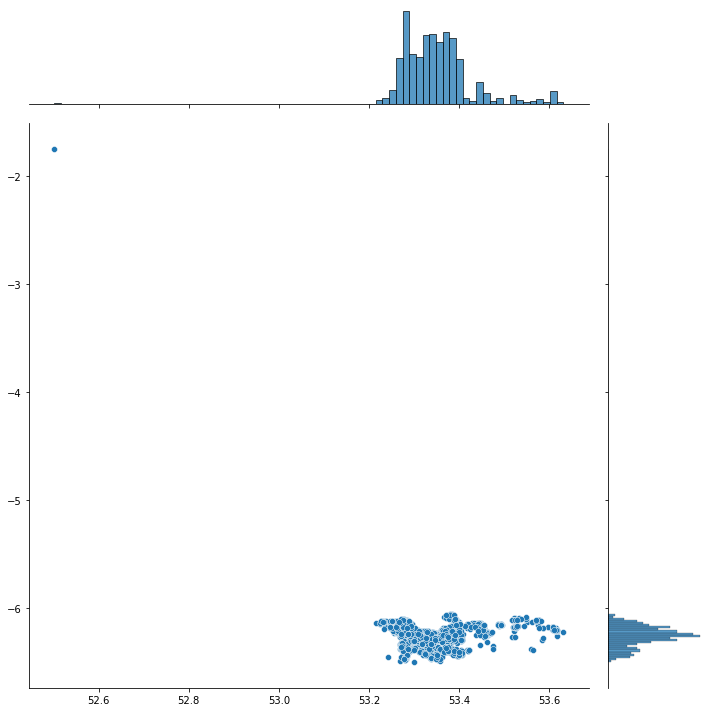

<function seaborn.utils.despine>

In [34]:
# plot the the latitude and longitude attributes (https://deepnote.com/@jz/House-prices-prediction-DuSZvuoNSEmb5cCKcsW4BQ)
plt.figure(figsize=(10,10))
sns.jointplot(x=df_train.Latitude.values, y=df_train.Longitude.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
sns.despine

The houses for sale are concentrated in quite a small area however there is one outlier which we will remove, essentially the one that is less than longitude of '-2' and latitude less than '53.0'.

In [35]:
index_train = df_train[(df_train['Longitude'] > -2.0)|(df_train['Latitude'] < 53.0)].index
index_test = df_test[(df_test['Longitude'] > -2.0)|(df_test['Latitude'] < 53.0)].index
df_train.drop(index_train, inplace=True)
df_test.drop(index_test, inplace=True)
df_train['Longitude'].describe()

count    1637.000000
mean    -6.257841   
std      0.091825   
min     -6.497000   
25%     -6.309640   
50%     -6.247821   
75%     -6.194319   
max     -6.054719   
Name: Longitude, dtype: float64

<Figure size 720x720 with 0 Axes>

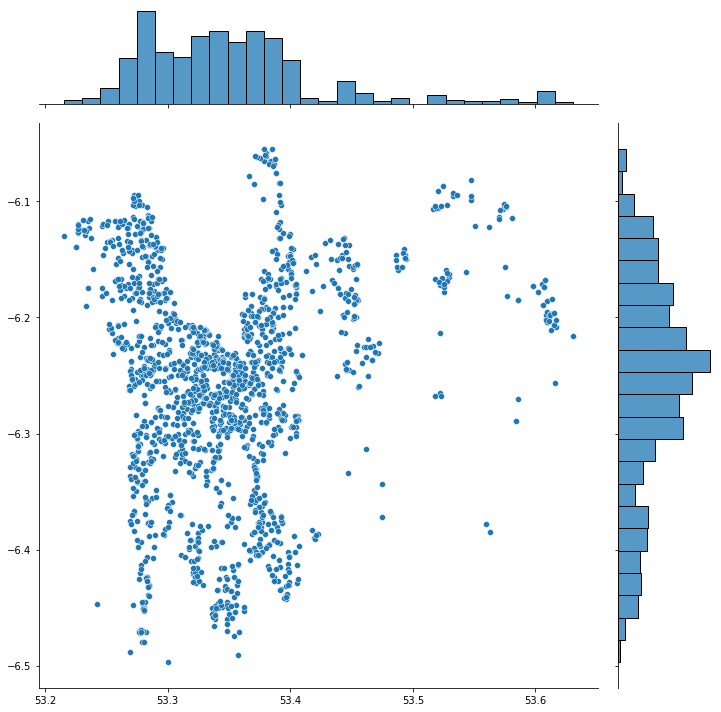

<function seaborn.utils.despine>

In [36]:
# plot the the Latitude and Longitude attributes (https://deepnote.com/@jz/House-prices-prediction-DuSZvuoNSEmb5cCKcsW4BQ)
plt.figure(figsize=(10,10))
sns.jointplot(x=df_train.Latitude.values, y=df_train.Longitude.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
sns.despine

Eliminating the longitude and latitude outlier presents us with a very clean view of remaining data with a high concentration of houses between longitude 6.0 and 6.5 and latitude 53.2 and 53.7. But let's also check the number of distinct categories per attribute, that is, the cardinality:

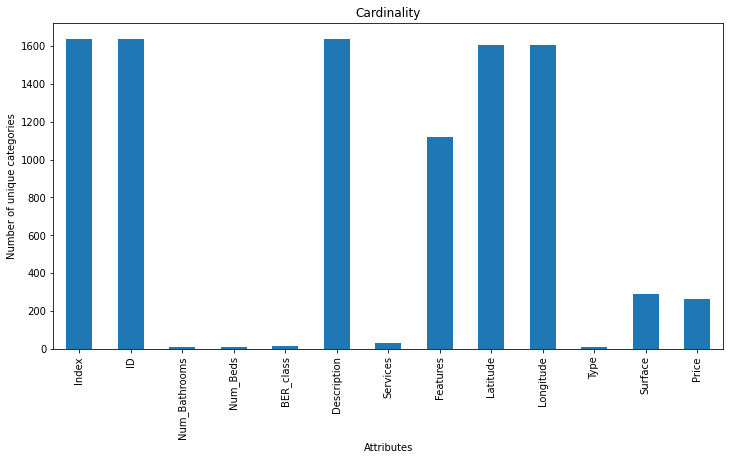

In [37]:
# plot the cardinality of the attributes
df_train.nunique().plot.bar(figsize=(12,6))
plt.ylabel('Number of unique categories')
plt.xlabel('Attributes')
plt.title('Cardinality')
plt.show()

Based on previous observations and the attribute cardinality we will check the following attributes for outliers; Num_Bathrooms, Num_Beds, Type, Surface and Price

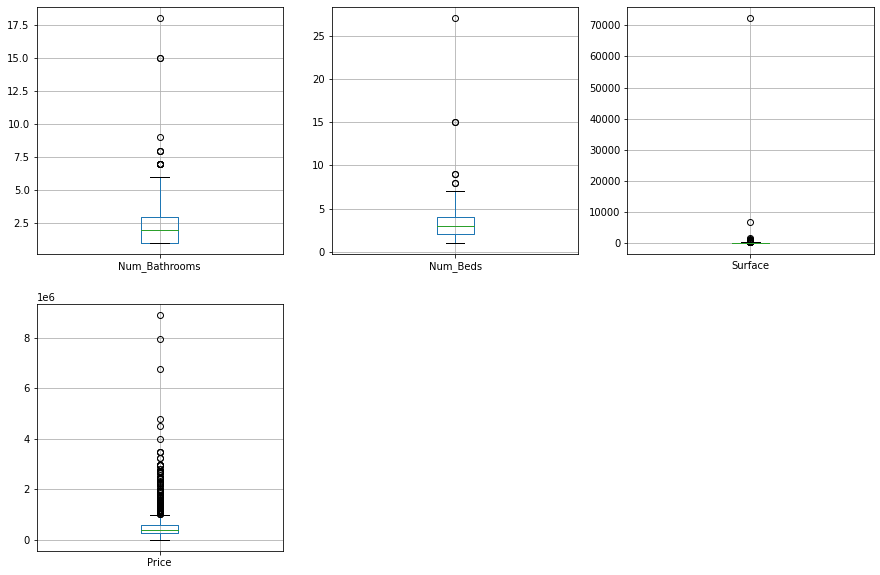

In [38]:
# plot a boxplot of the features Num_Bathrooms, Num_Beds, Surface and Price
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(2, 3, 1)
df_train.boxplot(column='Num_Bathrooms')
ax2 = fig.add_subplot(2, 3, 2)
df_train.boxplot(column='Num_Beds')
ax3 = fig.add_subplot(2, 3, 3)
df_train.boxplot(column='Surface')
ax4 = fig.add_subplot(2, 3, 4)
df_train.boxplot(column='Price')
plt.show()

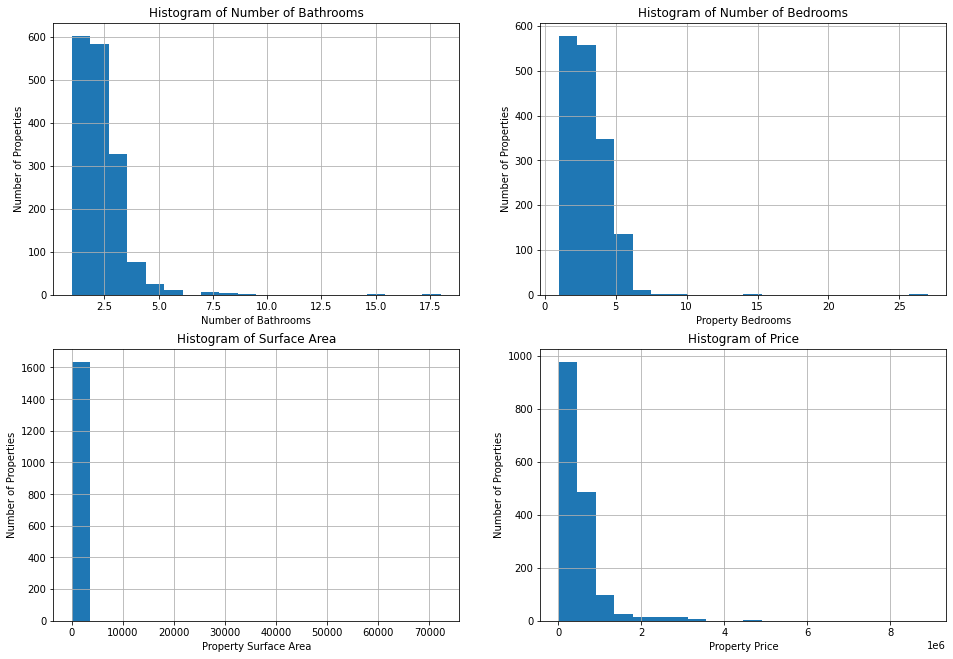

In [39]:
# plot the histograms for the attributes bathrooms, beds, surface and price
fig = plt.figure(figsize=(16,35))

ax1 = fig.add_subplot(6, 2, 1)
ax1.set_title("Histogram of Number of Bathrooms")
ax1.set_xlabel('Number of Bathrooms')
ax1.set_ylabel('Number of Properties')
df_train['Num_Bathrooms'].hist(bins=20)

ax2 = fig.add_subplot(6, 2, 2)
ax2.set_title("Histogram of Number of Bedrooms")
ax2.set_xlabel('Property Bedrooms')
ax2.set_ylabel('Number of Properties')
df_train['Num_Beds'].hist(bins=20)

ax3 = fig.add_subplot(6, 2, 3)
ax3.set_title("Histogram of Surface Area")
ax3.set_xlabel('Property Surface Area')
ax3.set_ylabel('Number of Properties')
df_train['Surface'].hist(bins=20)

ax4 = fig.add_subplot(6, 2, 4)
ax4.set_title("Histogram of Price")
ax4.set_xlabel('Property Price')
ax4.set_ylabel('Number of Properties')
df_train['Price'].hist(bins=20)

plt.show()

There are clearly outliers for the bedroom and bathroom features. We will remove those properties that have greater than either 6 bedrooms or bathrooms.

In [40]:
# let's check the bathrooms values
df_train.Num_Bathrooms.drop_duplicates()

0       2 
1       1 
2       3 
13      4 
94      6 
218     7 
279     5 
557     15
612     9 
861     8 
1378    18
Name: Num_Bathrooms, dtype: int64

In [41]:
# remove properties with greater than 6 bathrooms in both datasets (https://medium.com/@harsz89/how-to-drop-rows-based-on-column-values-using-pandas-dataframe-38cf50e4c95a)
indexNames = df_train[df_train['Num_Bathrooms'] >= 7].index
df_train.drop(indexNames , inplace=True)
indexNames = df_test[df_test['Num_Bathrooms'] >= 7].index
df_test.drop(indexNames , inplace=True)

In [42]:
# let's check the bathrooms values
df_train.Num_Bathrooms.drop_duplicates()

0      2
1      1
2      3
13     4
94     6
279    5
Name: Num_Bathrooms, dtype: int64

In [43]:
# let's check the bedrooms values
df_train.Num_Beds.drop_duplicates()

0      2
2      3
4      4
13     5
26     1
49     6
94     7
342    9
Name: Num_Beds, dtype: int64

In [44]:
# remove properties with greater than 6 bedrooms in both datasets (https://medium.com/@harsz89/how-to-drop-rows-based-on-column-values-using-pandas-dataframe-38cf50e4c95a)
indexNames = df_train[df_train['Num_Beds'] >= 7].index
df_train.drop(indexNames , inplace=True)
indexNames = df_test[df_test['Num_Beds'] >= 7].index
df_test.drop(indexNames , inplace=True)

In [45]:
# let's check the bedrooms values
df_train.Num_Beds.drop_duplicates()

0     2
2     3
4     4
13    5
26    1
49    6
Name: Num_Beds, dtype: int64

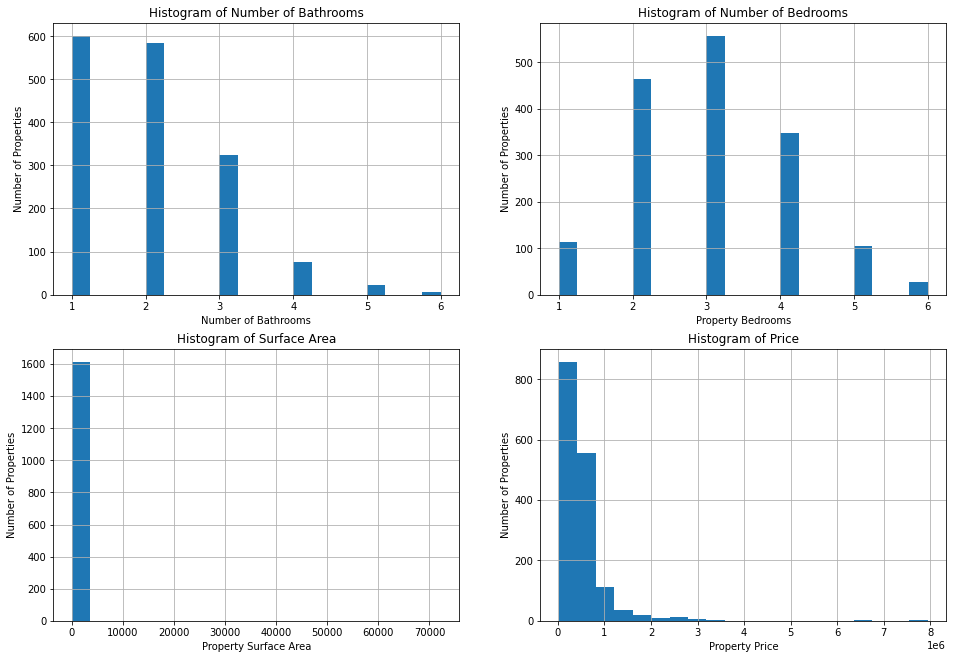

In [46]:
# plot the histograms for the attributes bathrooms, beds, surface and price
fig = plt.figure(figsize=(16,35))

ax1 = fig.add_subplot(6, 2, 1)
ax1.set_title("Histogram of Number of Bathrooms")
ax1.set_xlabel('Number of Bathrooms')
ax1.set_ylabel('Number of Properties')
df_train['Num_Bathrooms'].hist(bins=20)

ax2 = fig.add_subplot(6, 2, 2)
ax2.set_title("Histogram of Number of Bedrooms")
ax2.set_xlabel('Property Bedrooms')
ax2.set_ylabel('Number of Properties')
df_train['Num_Beds'].hist(bins=20)

ax3 = fig.add_subplot(6, 2, 3)
ax3.set_title("Histogram of Surface Area")
ax3.set_xlabel('Property Surface Area')
ax3.set_ylabel('Number of Properties')
df_train['Surface'].hist(bins=20)

ax4 = fig.add_subplot(6, 2, 4)
ax4.set_title("Histogram of Price")
ax4.set_xlabel('Property Price')
ax4.set_ylabel('Number of Properties')
df_train['Price'].hist(bins=20)

plt.show()

It looks like all outliers have been eliminated.

In [47]:
# check how many instances we have left
print('Training dataset shape is {} '.format(df_train.shape))
print('Test dataset shape is {} '.format(df_test.shape))

Training dataset shape is (1615, 13) 
Test dataset shape is (697, 12) 


In [48]:
# check for missing values 
print('Number of missing values for each feature')
df_train.isna().sum()

Number of missing values for each feature


Index            0   
ID               0   
Num_Bathrooms    0   
Num_Beds         0   
BER_class        0   
Description      0   
Services         1041
Features         0   
Latitude         0   
Longitude        0   
Type             0   
Surface          0   
Price            0   
dtype: int64

Even though there are missing values in the services we will keep them for the NLP piece of work.

In [49]:
df_train.head(1)

,Index,ID,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface,Price
0,1,12409116,2,2,9,"DNG are delighted to present to the market no. 5 Chipping Row. This two bedroom apartment comes to the market in excellent condition throughout. Viewers will be sure to see the meticulous care and attention the home owner has for this property. \n\r\nThis well-presented apartment comprises of an open plan living and dining room, kitchen, two spacious double bedrooms the master benefitting from the a large en-suite and an extensively tiled bathroom. This property benefits from own door access, designated car parking and a quiet and private location.\n\r\nChipping Row is well serviced by excellent public transport links to Dublin City centre. Dublin Airport, N3 / M3 and M50 are all within an easy reach. Local primary and secondary schools, Blanchardstown Shopping Centre are all within driving distance. Ongar village and all it has to offer including supermarket, restaurants, shops and pharmacy€TM is only a short walk away.\n\r\nViewing comes highly recommended.\n\r\nFeatures:\r\nGround floor two bedroom apartment\r\n67 sqm / 721 sqft\r\nBuilt c. 2005\r\nDouble glazed windows throughout\r\nElectric heating\r\nOwn door access\r\nDesignated and visitor car parking \r\nManagement fee €"" approx. €760\r\nManagement Company €"" CORE\n\n\r\nAccommodation\r\nLiving/dining room 5.2m x 3.3m\r\nLaminate flooring, feature fireplace, large window to the front of the property.\r\nKitchen 3.4m x 1\r\nLaminate flooring, wall and floor fitted kitchen units, plumbed for washing machine. \r\nBedroom 1 5.1m x 2.2m\r\nLarge double bedroom, fitted wardrobes, ample storage space, en-suite off.\r\nEn-suite 2.5m x 1.6m\r\nExtensively tiled, shower, whb, wc.\r\nBedroom 2 3.7m x 2.7m\r\nLarge double bedroom, fitted wardrobes, ample storage space.\r\nBathroom 2.5m x 1.7m\r\nExtensively tiled, bath with over-head shower, whb, wc.",NaN,None,53.396659,-6.438791,1,67,195000


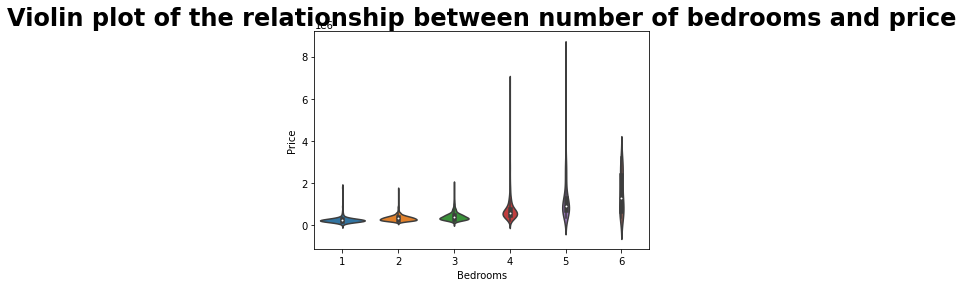

In [50]:
# examine the relationship between price and beds using a violin plot
sns.violinplot(data=df_train, x='Num_Beds', y='Price')
plt.title('Violin plot of the relationship between number of bedrooms and price', fontdict= { 'fontsize': 24, 'fontweight':'bold'})
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

The distribution of the data indicates the median price of a house increases gradually based on an increasing number of bedrooms, while also indicating some very high prices for houses with between 3 to 6 bedrooms.

We now have a complete dataset that is appropriate for natural language processing.

Natural language processing ([NLP](https://en.wikipedia.org/wiki/Natural_language_processing)) is a subfield of linguistics, computer science, and artificial intelligence.

* NLP concerned with the interactions between computers and human language.
* In particular how to program computers to process and analyze large amounts of natural language data. 
* The goal is a computer capable of "understanding" the contents of documents.
* Including the contextual nuances of the language within them. 
* The technology can then accurately extract information and insights contained in the documents.
* As well as categorize and organize the documents themselves. 

# NATURAL LANGUAGE PROCESSING

Your comments, explanation, and references here.

In [51]:
# combine the text features, Description, Services and Features
# (https://stackoverflow.com/questions/33158417/pandas-combine-two-strings-ignore-nan-values)
df_train['Property_Description'] = df_train['Description'].fillna('') + ' ' + df_train['Services'].fillna('') + ' ' + df_train['Features'].fillna('')

In [52]:
# drop the text features, Description, Services and Features
df_train.drop(['Description', 'Services', 'Features'], axis = 1, inplace = True)

In [53]:
# show the first data frame row in the training dataset
df_train.head(1)

,Index,ID,Num_Bathrooms,Num_Beds,BER_class,Latitude,Longitude,Type,Surface,Price,Property_Description
0,1,12409116,2,2,9,53.396659,-6.438791,1,67,195000,"DNG are delighted to present to the market no. 5 Chipping Row. This two bedroom apartment comes to the market in excellent condition throughout. Viewers will be sure to see the meticulous care and attention the home owner has for this property. \n\r\nThis well-presented apartment comprises of an open plan living and dining room, kitchen, two spacious double bedrooms the master benefitting from the a large en-suite and an extensively tiled bathroom. This property benefits from own door access, designated car parking and a quiet and private location.\n\r\nChipping Row is well serviced by excellent public transport links to Dublin City centre. Dublin Airport, N3 / M3 and M50 are all within an easy reach. Local primary and secondary schools, Blanchardstown Shopping Centre are all within driving distance. Ongar village and all it has to offer including supermarket, restaurants, shops and pharmacy€TM is only a short walk away.\n\r\nViewing comes highly recommended.\n\r\nFeatures:\r\nGround floor two bedroom apartment\r\n67 sqm / 721 sqft\r\nBuilt c. 2005\r\nDouble glazed windows throughout\r\nElectric heating\r\nOwn door access\r\nDesignated and visitor car parking \r\nManagement fee €"" approx. €760\r\nManagement Company €"" CORE\n\n\r\nAccommodation\r\nLiving/dining room 5.2m x 3.3m\r\nLaminate flooring, feature fireplace, large window to the front of the property.\r\nKitchen 3.4m x 1\r\nLaminate flooring, wall and floor fitted kitchen units, plumbed for washing machine. \r\nBedroom 1 5.1m x 2.2m\r\nLarge double bedroom, fitted wardrobes, ample storage space, en-suite off.\r\nEn-suite 2.5m x 1.6m\r\nExtensively tiled, shower, whb, wc.\r\nBedroom 2 3.7m x 2.7m\r\nLarge double bedroom, fitted wardrobes, ample storage space.\r\nBathroom 2.5m x 1.7m\r\nExtensively tiled, bath with over-head shower, whb, wc. None"


In [54]:
# remove anything that is not a letter from the property description
df_train['Property_Description'] = [re.sub('[^a-zA-Z]', ' ', t) for t in df_train['Property_Description']]

In [55]:
# make everything lowercase and remove all the leading and trailing spaces from the property description
df_train['Property_Description'] = df_train['Property_Description'].apply(lambda x: x.lower().strip())

In [56]:
# remove duplicate spaces from the property description
df_train['Property_Description'] = df_train['Property_Description'].replace({' +':' '},regex=True)

In [57]:
# remove single character words from the property description
df_train['Property_Description'] = df_train['Property_Description'].str.replace(r'\b\w\b','').str.replace(r'\s+', ' ')

In [58]:
# remove duplicate spaces from the property description
df_train['Property_Description'] = df_train['Property_Description'].replace({' +':' '},regex=True)

In [59]:
# import english stopwords with nltk so they can be filtered out before processing
# https://towardsdatascience.com/how-to-clean-text-data-639375414a2f
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
english_stopwords = stopwords.words('english')
df_train['Property_Description'] = df_train['Property_Description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (english_stopwords)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [60]:
# show the first data frame row in the training dataset
df_train.head(1)

,Index,ID,Num_Bathrooms,Num_Beds,BER_class,Latitude,Longitude,Type,Surface,Price,Property_Description
0,1,12409116,2,2,9,53.396659,-6.438791,1,67,195000,dng delighted present market chipping row two bedroom apartment comes market excellent condition throughout viewers sure see meticulous care attention home owner property well presented apartment comprises open plan living dining room kitchen two spacious double bedrooms master benefitting large en suite extensively tiled bathroom property benefits door access designated car parking quiet private location chipping row well serviced excellent public transport links dublin city centre dublin airport within easy reach local primary secondary schools blanchardstown shopping centre within driving distance ongar village offer including supermarket restaurants shops pharmacy tm short walk away viewing comes highly recommended features ground floor two bedroom apartment sqm sqft built double glazed windows throughout electric heating door access designated visitor car parking management fee approx management company core accommodation living dining room laminate flooring feature fireplace large window front property kitchen laminate flooring wall floor fitted kitchen units plumbed washing machine bedroom large double bedroom fitted wardrobes ample storage space en suite en suite extensively tiled shower whb wc bedroom large double bedroom fitted wardrobes ample storage space bathroom extensively tiled bath head shower whb wc none


In [61]:
# create the NLP function
from nltk.tokenize import word_tokenize  
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
nltk.download('punkt')
nltk.download('wordnet')

def nlp_preprocess(some_text):
  """
  Normalization using NLTK and spaCy
  """
  # 1. Tokenization
  NLP_token = word_tokenize(some_text)

  # 2. Stemming
  PS = PorterStemmer()
  NLP_stem = []
  for word in NLP_token:
      NLP_stem.append(PS.stem(word))

  # 3. Lemmatization
  WL = WordNetLemmatizer()
  NLP_lemma = []
  for word in NLP_stem:
      NLP_lemma.append(WL.lemmatize(word))
  
  # 4. Stopword   
  FS = []  
  NLP_stop = set(stopwords.words("english"))
  for w in NLP_lemma:  
      if w not in NLP_stop:  
        FS.append(w)
  
  # 5. Punctuation  
  punctuations = "?:!.,;"
  for word in FS:
      if word in punctuations:
          FS.remove(word)

  # convert list into a string
  # return string  
  return " ".join(FS)

  # print comparison
  print(" ")
  print(some_text)
  print(FS)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [62]:
# check that the code is working as expected
print(df_train['Property_Description'].iloc[0])
print(nlp_preprocess(df_train['Property_Description'].iloc[0]))

dng delighted present market chipping row two bedroom apartment comes market excellent condition throughout viewers sure see meticulous care attention home owner property well presented apartment comprises open plan living dining room kitchen two spacious double bedrooms master benefitting large en suite extensively tiled bathroom property benefits door access designated car parking quiet private location chipping row well serviced excellent public transport links dublin city centre dublin airport within easy reach local primary secondary schools blanchardstown shopping centre within driving distance ongar village offer including supermarket restaurants shops pharmacy tm short walk away viewing comes highly recommended features ground floor two bedroom apartment sqm sqft built double glazed windows throughout electric heating door access designated visitor car parking management fee approx management company core accommodation living dining room laminate flooring feature fireplace larg

Results look as expected so now let's run it on the entire dataframe

In [63]:
# apply the NLP pre processing functionality to the combined 'Property_Description' feature
df_train['Property_Description'] = df_train['Property_Description'].apply(lambda x: nlp_preprocess(x))

In [64]:
# show the first data frame row
df_train.head(1)

,Index,ID,Num_Bathrooms,Num_Beds,BER_class,Latitude,Longitude,Type,Surface,Price,Property_Description
0,1,12409116,2,2,9,53.396659,-6.438791,1,67,195000,dng delight present market chip row two bedroom apart come market excel condit throughout viewer sure see meticul care attent home owner properti well present apart compris open plan live dine room kitchen two spaciou doubl bedroom master benefit larg en suit extens tile bathroom properti benefit door access design car park quiet privat locat chip row well servic excel public transport link dublin citi centr dublin airport within easi reach local primari secondari school blanchardstown shop centr within drive distanc ongar villag offer includ supermarket restaur shop pharmaci tm short walk away view come highli recommend featur ground floor two bedroom apart sqm sqft built doubl glaze window throughout electr heat door access design visitor car park manag fee approx manag compani core accommod live dine room lamin floor featur fireplac larg window front properti kitchen lamin floor wall floor fit kitchen unit plumb wash machin bedroom larg doubl bedroom fit wardrob ampl storag space en suit en suit extens tile shower whb wc bedroom larg doubl bedroom fit wardrob ampl storag space bathroom extens tile bath head shower whb wc none


In [65]:
# calculate the number of unique values in each column of the dataframe
nunique = df_train.nunique()
print(nunique)

Index                   1615
ID                      1615
Num_Bathrooms           6   
Num_Beds                6   
BER_class               16  
Latitude                1582
Longitude               1583
Type                    10  
Surface                 276 
Price                   261 
Property_Description    1614
dtype: int64


Now create new features with NLP.

CountVectorizer creates a matrix in which each unique word is represented by a column of the matrix, and each text sample from the document is a row in the matrix. The value of each cell is nothing but the count of the word in that particular text sample. (https://www.geeksforgeeks.org/using-countvectorizer-to-extracting-features-from-text/)

In [66]:
# Convert a collection of text documents to a matrix of token counts
vectorizer = CountVectorizer()

In [67]:
## training
# transforming property description into counts
# counting the number of times a word appears in each property description
# 'x_train_count' is a sparse matrix, this avoids storing the zeroes

df_train_count = vectorizer.fit_transform(df_train['Property_Description'])

# returns n_features
print("total unique words =", df_train_count.shape[1])

total unique words = 7085


In [68]:
# show the counts in train
print(df_train_count)

  (0, 1905)	1
  (0, 1778)	1
  (0, 4956)	2
  (0, 3977)	2
  (0, 1213)	2
  (0, 5427)	2
  (0, 6562)	3
  (0, 610)	7
  (0, 266)	3
  (0, 1400)	2
  (0, 2307)	2
  (0, 1453)	1
  (0, 6357)	2
  (0, 6762)	1
  (0, 6160)	1
  (0, 5582)	1
  (0, 4092)	1
  (0, 1024)	1
  (0, 413)	1
  (0, 3153)	1
  (0, 4628)	1
  (0, 5012)	3
  (0, 6880)	2
  (0, 1435)	1
  (0, 4547)	1
  :	:
  (1614, 5795)	2
  (1614, 4704)	1
  (1614, 6308)	1
  (1614, 701)	2
  (1614, 5420)	2
  (1614, 1501)	1
  (1614, 1398)	1
  (1614, 5025)	1
  (1614, 133)	1
  (1614, 759)	1
  (1614, 2465)	1
  (1614, 6952)	1
  (1614, 2988)	1
  (1614, 6706)	2
  (1614, 3789)	1
  (1614, 2199)	1
  (1614, 5644)	6
  (1614, 2802)	1
  (1614, 3673)	1
  (1614, 3747)	1
  (1614, 4197)	1
  (1614, 5642)	1
  (1614, 3242)	1
  (1614, 750)	2
  (1614, 5688)	1


In [69]:
# full matrix
df_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [70]:
# array mapping from feature integer indices to feature name
matrix = vectorizer.get_feature_names()
print(matrix)

['abath', 'abbey', 'abbeyfield', 'abbeylea', 'abc', 'abfter', 'abil', 'abington', 'abl', 'abod', 'abound', 'abov', 'abroad', 'absolut', 'abund', 'abundac', 'abut', 'abwood', 'ac', 'academi', 'acanthu', 'acc', 'accent', 'accentu', 'accentur', 'accept', 'access', 'accessori', 'acclaim', 'accolad', 'accomad', 'accomm', 'accommmod', 'accommod', 'accommodationi', 'accommodaton', 'accommodi', 'accommodt', 'accomod', 'accompani', 'accord', 'accordian', 'accordingli', 'accordion', 'account', 'accoutr', 'accumul', 'accur', 'accuraci', 'ace', 'acer', 'achiev', 'achil', 'acorn', 'acoust', 'acquat', 'acquir', 'acr', 'across', 'act', 'action', 'activ', 'activist', 'actual', 'ad', 'adam', 'adamstown', 'adapt', 'add', 'addison', 'addit', 'additon', 'address', 'addtion', 'ade', 'adelaid', 'adelphi', 'adequ', 'adivs', 'adjac', 'adjoin', 'adjust', 'admir', 'admiss', 'adn', 'adopt', 'adorn', 'adre', 'adult', 'advanc', 'advantag', 'adventur', 'advert', 'advertis', 'advic', 'advis', 'advisor', 'aeg', 'aera

In [71]:
# lets look at the top 10 most common words (https://colab.research.google.com/github/littlecolumns/ds4j-notebooks/blob/master/text-analysis/notebooks/Counting%20words%20with%20scikit-learn%27s%20CountVectorizer.ipynb#scrollTo=ByPv_ULAeCkZ)
counts = pd.DataFrame(df_train_count.toarray(),
                      columns=vectorizer.get_feature_names())

counts.T.sort_values(by=0, ascending=False).head(10)

0     1     2     3     4     5     6     7     8     9     10    \
bedroom  7     1     8     2     8     6     3     3     3     4     5      
doubl    4     1     3     1     11    4     2     0     3     1     4      
larg     4     0     2     1     1     4     2     4     0     0     0      
floor    4     5     6     0     10    6     3     2     0     0     0      
suit     3     0     2     0     4     0     1     1     0     0     0      
en       3     0     2     0     4     0     0     1     0     0     0      
extens   3     0     0     0     0     1     0     1     0     0     0      
kitchen  3     1     2     1     2     2     2     1     2     2     5      
tile     3     0     8     0     3     3     0     0     0     0     2      
apart    3     0     0     0     0     0     6     0     0     0     0      

         11    12    13    14    15    16    17    18    19    20    21    \
bedroom  4     6     8     3     4     7     4     6     3     7     4      
doubl    1     2     0     2     2     1     0     0     1     5     2      
larg     1     3     3     1     3     4     1     1     4     3     0      
floor    1     12    4     1     5     19    1     0     6     8     1      
suit     0     0     2     0     0     0     0     0     0     0     0      
en       0     0     1     0     0     0     0     0     0     0     0      
extens   2     1     0     0     0     0     0     0     0     0     0      
kitchen  5     1     3     1     4     3     1     2     2     3     2      
tile     2     9     0     0     1     9     0     0     2     4     0      
apart    0     0     0     0     0     0     0     0     8     0     4      

         22    23    24    25    26    27    28    29    30    31    32    \
bedroom  5     7     4     9     3     5     5     0     2     11    4      
doubl    3     5     0     6     3     3     1     0     2     4     1      
larg     4     9     1     2     3     4     2     1     4     4     0      
floor    0     13    3     8     7     2     10    0     1     16    8      
suit     0     3     0     3     1     0     2     0     1     1     3      
en       0     1     0     3     0     0     2     0     1     1     1      
extens   0     6     0     0     0     0     0     0     0     0     1      
kitchen  2     4     2     4     3     3     5     0     1     5     4      
tile     0     4     0     5     3     4     7     0     0     4     6      
apart    0     0     2     0     1     4     0     0     0     0     1      

         33    34    35    36    37    38    39    40    41    42    43    \
bedroom  12    3     3     2     2     7     6     3     7     3     4      
doubl    3     2     4     2     0     4     2     5     2     2     1      
larg     1     0     0     0     2     1     0     1     1     3     1      
floor    6     11    2     6     1     8     3     4     13    0     11     
suit     0     2     1     0     0     0     1     0     2     0     0      
en       0     2     1     0     0     0     1     0     2     0     0      
extens   2     2     0     0     2     0     0     1     0     0     1      
kitchen  3     5     1     1     4     2     2     3     3     1     4      
tile     1     4     0     2     0     6     0     2     3     0     4      
apart    0     0     1     2     0     4     0     0     0     0     0      

         44    45    46    47    48    49    50    51    52    53    54    \
bedroom  7     5     4     2     1     6     3     1     2     7     4      
doubl    2     1     0     1     1     0     2     0     2     4     3      
larg     3     1     1     0     0     0     0     0     3     2     1      
floor    2     7     6     0     0     9     0     1     3     10    11     
suit     0     4     0     0     0     0     0     0     0     3     0      
en       0     4     0     0     0     0     0     0     0     1     0      
extens   0     0     0     0     0     0     0     0     0     0     2      
k

Let's use  Tfidftransformer and Tfidfvectorizer to look at the inverse document frequency.

TF-IDF (term frequency-inverse document frequency) is a statistical measure that evaluates how relevant a word is to a document in a collection of documents. The inverse document frequency of the word across a set of documents, essentially how common or rare a word is in the entire document set. (https://monkeylearn.com/blog/what-is-tf-idf/)

In [72]:
# calculate the IDF values (https://kavita-ganesan.com/tfidftransformer-tfidfvectorizer-usage-differences/)

# tf_idf = TfidfTransformer()
# df_train_count_tf_idf = tf_idf.fit_transform(df_train_count)

tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True) 
tfidf_transformer.fit(df_train_count)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [73]:
# print idf values 
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=vectorizer.get_feature_names(),columns=["idf_weights"]) 
 
# sort ascending and just display the top 20 words
df_idf.sort_values(by=['idf_weights']).head(20)

,idf_weights
bedroom,1.014963
kitchen,1.025064
bathroom,1.100149
room,1.110462
locat,1.121580
park,1.140629
floor,1.162228
accommod,1.173941
doubl,1.185048
live,1.204598


In [75]:
# settings that you use for count vectorizer will go here 
tfidf_vectorizer=TfidfVectorizer(use_idf=True) 
 
# just send in all your docs here 
# tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(df_train_count)

In [76]:
# create a new dataframe specifcally to use the freature Property_Description to predict the price of a house after applying NLP
df_train_nlp = df_train.filter(['Index', 'ID',	'Property_Description', 'Price'], axis = 1)
df_test_nlp = df_train.filter(['Index', 'ID',	'Property_Description', 'Price'], axis = 1)

In [77]:
# first rows of the NLP training dataset
df_train_nlp.head(1)

,Index,ID,Property_Description,Price
0,1,12409116,dng delight present market chip row two bedroom apart come market excel condit throughout viewer sure see meticul care attent home owner properti well present apart compris open plan live dine room kitchen two spaciou doubl bedroom master benefit larg en suit extens tile bathroom properti benefit door access design car park quiet privat locat chip row well servic excel public transport link dublin citi centr dublin airport within easi reach local primari secondari school blanchardstown shop centr within drive distanc ongar villag offer includ supermarket restaur shop pharmaci tm short walk away view come highli recommend featur ground floor two bedroom apart sqm sqft built doubl glaze window throughout electr heat door access design visitor car park manag fee approx manag compani core accommod live dine room lamin floor featur fireplac larg window front properti kitchen lamin floor wall floor fit kitchen unit plumb wash machin bedroom larg doubl bedroom fit wardrob ampl storag space en suit en suit extens tile shower whb wc bedroom larg doubl bedroom fit wardrob ampl storag space bathroom extens tile bath head shower whb wc none,195000


In [ ]:
# first rows of the NLP training dataset
df_test_nlp.head(1)

In [78]:
df_train_nlp.describe()

,Index,ID,Price
count,1615.000000,1.615000e+03,1.615000e+03
mean,817.508978,1.232191e+07,5.340135e+05
std,472.202506,1.423976e+05,4.877499e+05
min,1.000000,1.118567e+07,1.999500e+04
25%,409.500000,1.228375e+07,2.950000e+05
50%,817.000000,1.238183e+07,3.950000e+05
75%,1226.500000,1.240575e+07,5.950000e+05
max,1638.000000,1.242836e+07,7.950000e+06


# PIECEWISE REGRESSION

**Piecewise regression**, extract from [Wikipedia](https://en.wikipedia.org/wiki/Segmented_regression):

Segmented regression, also known as piecewise regression or broken-stick regression, is a method in regression analysis in which the independent variable is partitioned into intervals and a separate line segment is fit to each interval. 

* Segmented regression analysis can also be performed on 
multivariate data by partitioning the various independent variables. 
* Segmented regression is useful when the independent variables, clustered into different groups, exhibit different relationships between the variables in these regions. 

* The boundaries between the segments are breakpoints.

* Segmented linear regression is segmented regression whereby the relations in the intervals are obtained by linear regression. 

Your comments, explanation, and references here.

In [82]:
# create new dataframes specifcally for Piecewise Regression without the freature Property_Description to predict the price of a house
df_train_pr = df_train.filter(['Index', 'ID', 'Num_Bathrooms',	'Num_Beds',	'BER_class', 'Latitude', 'Longitude',	'Type',	'Surface', 'Price'], axis = 1)
df_test_pr = df_train.filter(['Index', 'ID', 'Num_Bathrooms',	'Num_Beds',	'BER_class', 'Latitude', 'Longitude',	'Type',	'Surface'], axis = 1)

In [83]:
# first row of the Piecewise Regression training dataset
df_train_pr.head(1)

,Index,ID,Num_Bathrooms,Num_Beds,BER_class,Latitude,Longitude,Type,Surface,Price
0,1,12409116,2,2,9,53.396659,-6.438791,1,67,195000


In [84]:
# first row of the Piecewise Regression training dataset
df_test_pr.head(1)

,Index,ID,Num_Bathrooms,Num_Beds,BER_class,Latitude,Longitude,Type,Surface
0,1,12409116,2,2,9,53.396659,-6.438791,1,67


Create the training and test data

In [86]:
 # split data into training and test
from sklearn.model_selection import train_test_split

y = df_train_pr['Price']
X = df_train_pr.drop('Price', axis=1).values

# training: 70% (0.7), test: 30% (0.3) 
# you could try any other combination 
# but consider 50% of training as the low boundary
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [87]:
# select some features columns just for the baseline model
# assume not all of the features are informative or useful
# in this exercise you could try all of them if possible

# now only use the top 5 features as defined by the Random Forest Regressor
# previously I had used all the fetures 

feature_train = ['Num_Bathrooms', 'Num_Beds', 'Longitude', 'Latitude', 'Surface','Price']
# dropna: remove missing values
df_subset_train = df_train_pr[feature_train].dropna(axis=0)

feature_test = ['Num_Bathrooms', 'Num_Beds', 'Longitude', 'Latitude', 'Surface']
# dropna: remove missing values
df_subset_test  =  df_test[feature_test].dropna(axis=0)

print(df_subset_train.shape)
print(df_subset_test.shape)

(1615, 6)
(697, 5)


In [88]:
# check for NaNs although there shouldn't be any based on the data preperation
print('Number of nan in df_subset_train dataset: ',df_subset_train.isnull().sum().sum())
print('Number of nan in df_subset_test dataset: ',df_subset_test.isnull().sum().sum())

Number of nan in df_subset_train dataset:  0
Number of nan in df_subset_test dataset:  0


In [89]:
# final check for missing values
print('Number of missing values for each attribute')
df_train.isna().sum()

Number of missing values for each attribute


Index                   0
ID                      0
Num_Bathrooms           0
Num_Beds                0
BER_class               0
Latitude                0
Longitude               0
Type                    0
Surface                 0
Price                   0
Property_Description    0
dtype: int64

In [90]:
# train set, input columns
Xs_train = df_subset_train.iloc[:,0:-1].values 
# train set, output column, cost
ys_train = df_subset_train.iloc[:,-1].values.reshape(-1,1)   
# test set, input columns
Xs_test = df_subset_test.iloc[:,0:].values 
# test set, output column, cost
# y_test = df_cost.Expected.values

In [92]:
print('The training set input is of shape', (Xs_train.shape))
print('The testing set output is of shape', (ys_train.shape))
print('The testing set input is of shape', (Xs_test.shape))

The training set input is of shape (1615, 5)
The testing set output is of shape (1615, 1)
The testing set input is of shape (697, 5)


In [93]:
# StandardScaler() will normalize the features i.e. each column of X, 
# so, each column/feature/variable will have μ = 0 and σ = 1
sc = StandardScaler()

Xss_train = np.hstack([Xs_train,Xs_train[:,[2]]**2])
xscaler = sc.fit(Xss_train)
Xn_train = xscaler.transform(Xss_train)

Xss_test = np.hstack([Xs_test,Xs_test[:,[2]]**2])
Xn_test = xscaler.transform(Xss_test)

ylog = np.log(ys_train.astype('float'))
yscaler = StandardScaler().fit(ylog)
yn_train = yscaler.transform(ylog)

In [94]:
# model
with pm.Model() as model:
    #prior over the parameters of linear regression
    alpha = pm.Normal('alpha', mu=0, sigma=30)
    #we have one beta for each column of Xn
    beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn_train.shape[1])
    #prior over the variance of the noise
    sigma = pm.HalfCauchy('sigma_n', 5)
    #linear regression model in matrix form
    mu = alpha + pm.math.dot(beta, Xn_train.T)
    #likelihood, be sure that observed is a 1d vector
    like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn_train[:,0])

WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


Finished [100%]: Average Loss = 1,550.8


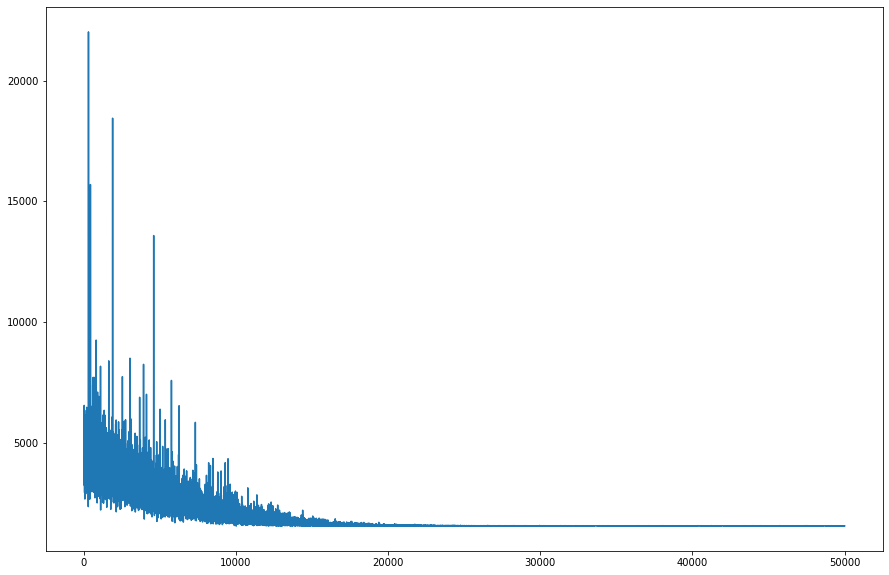

In [95]:
#number of iterations of the algorithms
iter = 50000 

# run the model
with model:
    approximation = pm.fit(iter,method='advi')
    
# check the convergence
plt.rcParams['figure.figsize'] = [15, 10]
plt.plot(approximation.hist);

In [96]:
# samples from the posterior
posterior = approximation.sample(5000)

In [98]:
# prediction
ll=np.mean(posterior['alpha']) + np.dot(np.mean(posterior['beta'],axis=0), Xn_test.T)
y_pred_BLR = np.exp(yscaler.inverse_transform(ll.reshape(-1,1)))[:,0]
# print("MAE = ",(np.mean(abs(y_pred_BLR - y_test))))
# print("MAPE = ",(np.mean(abs(y_pred_BLR - y_test) / y_test)))

In [131]:
# create the full test predictions dataframe (thanks to Rob Barrett for this snippet of code)
df_1 = df_test['Index']
df_2 = pd.DataFrame(y_pred_BLR, columns=['Price_Full'])
full_test_predictions = pd.concat([df_1, df_2], axis=1)
full_test_predictions.head(10)

,Index,Price_Full
0,1639.0,378917.576003
1,1640.0,645160.224367
2,1641.0,477133.185937
3,1642.0,823883.173179
4,1643.0,418193.942424
5,1644.0,279435.936620
6,1645.0,256500.344926
7,1646.0,408312.811470
8,1647.0,757664.734204
9,1648.0,770629.924053


## Clustering

## Full Model

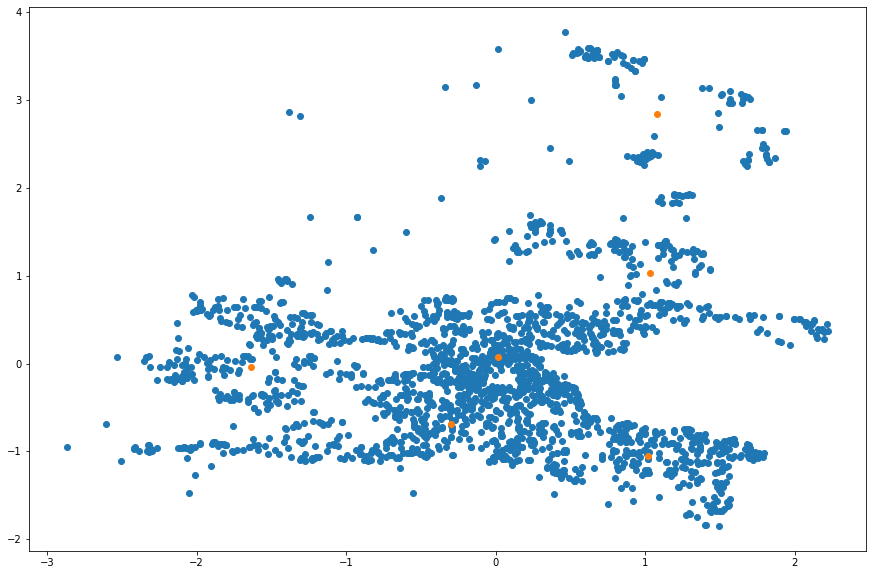

In [99]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=6)

# clustering by features 2 and 3 which is longitude and latitude so essentially location, location, location!
ind=[2,3]
X_ind = np.vstack([Xn_train[:,ind],Xn_test[:,ind]])
# Gaussian Mixture
gmm.fit(X_ind)
# plot blue dots
plt.scatter(X_ind[:,0],X_ind[:,1])
# centroids:  orange dots
plt.scatter(gmm.means_[:,0],gmm.means_[:,1])
plt.rcParams['figure.figsize'] = [25, 20]

In [100]:
# train clusters
clusters_train = gmm.predict(Xn_train[:,ind])
unique_train, counts_train = np.unique(clusters_train, return_counts=True)
dict(zip(unique_train, counts_train))

{0: 249, 1: 264, 2: 159, 3: 571, 4: 279, 5: 93}

In [101]:
# test clusters
clusters_test = gmm.predict(Xn_test[:,ind])
unique_test, counts_test = np.unique(clusters_test, return_counts=True)
dict(zip(unique_test, counts_test))

{0: 112, 1: 103, 2: 70, 3: 251, 4: 121, 5: 40}

In [102]:
# cluster 0
Xn0 = Xn_train[clusters_train==0,:]
Xtestn0 = Xn_test[clusters_test==0,:]

ylog0 = np.log(ys_train.astype('float')[clusters_train==0,:])
yscaler0 = StandardScaler().fit(ylog0)
yn0 = yscaler0.transform(ylog0)

In [103]:
# cluster 1
Xn1 = Xn_train[clusters_train==1,:]
Xtestn1 = Xn_test[clusters_test==1,:]
ylog1 = np.log(ys_train.astype('float')[clusters_train==1,:])
yscaler1 = StandardScaler().fit(ylog1)
yn1 = yscaler1.transform(ylog1)

In [104]:
# cluster 2
Xn2 = Xn_train[clusters_train==2,:]
Xtestn2 = Xn_test[clusters_test==2,:]
ylog2 = np.log(ys_train.astype('float')[clusters_train==2,:])
yscaler2 = StandardScaler().fit(ylog2)
yn2 = yscaler2.transform(ylog2)

In [105]:
# cluster 3
Xn3 = Xn_train[clusters_train==3,:]
Xtestn3 = Xn_test[clusters_test==3,:]
ylog3 = np.log(ys_train.astype('float')[clusters_train==3,:])
yscaler3 = StandardScaler().fit(ylog3)
yn3 = yscaler3.transform(ylog3)

In [106]:
# cluster 4
Xn4 = Xn_train[clusters_train==4,:]
Xtestn4 = Xn_test[clusters_test==4,:]
ylog4 = np.log(ys_train.astype('float')[clusters_train==4,:])
yscaler4 = StandardScaler().fit(ylog4)
yn4 = yscaler3.transform(ylog4)

In [107]:
# cluster 5
Xn5 = Xn_train[clusters_train==5,:]
Xte5 = Xn_test[clusters_test==5,:]
ylog5 = np.log(ys_train.astype('float')[clusters_train==4,:])
yscaler5 = StandardScaler().fit(ylog5)
yn5 = yscaler3.transform(ylog5)

## Piecewise Model

In [108]:
# model_0
with pm.Model() as model_0:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn0
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn0.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn0.T)
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn0[:,0])

with model_0:
  # iterations of the algorithm
  approximation = pm.fit(40000,method='advi')

# samples from the posterior   
posterior0 = approximation.sample(5000)

Finished [100%]: Average Loss = 230.22


In [109]:
# model_1
with pm.Model() as model_1:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn0
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn1.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn1.T)
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn1[:,0])

with model_1:
  # iterations of the algorithm
  approximation = pm.fit(40000,method='advi')

# samples from the posterior   
posterior1 = approximation.sample(5000)

Finished [100%]: Average Loss = 272.54


In [110]:
# model_2
with pm.Model() as model_2:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn2
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn2.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn2.T)
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn2[:,0])

with model_2:
  # iterations of the algorithm
  approximation = pm.fit(40000,method='advi')

# samples from the posterior   
posterior2 = approximation.sample(5000)

Finished [100%]: Average Loss = 139.85


In [111]:
# model_3
with pm.Model() as model_3:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn3
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn3.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn3.T)
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn3[:,0])

with model_3:
  # iterations of the algorithm
  approximation = pm.fit(40000,method='advi')

# samples from the posterior   
posterior3 = approximation.sample(5000)

Finished [100%]: Average Loss = 475.5


In [112]:
# model_4
with pm.Model() as model_4:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn4
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn4.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn4.T)
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn4[:,0])

with model_4:
  # iterations of the algorithm
  approximation = pm.fit(40000,method='advi')

# samples from the posterior   
posterior4 = approximation.sample(5000)

Finished [100%]: Average Loss = 160.46


In [113]:
# Posterior predictive checks (PPCs)
def ppc(alpha,beta,sigma, X,  nsamples=500):
    #we select nsamples random samples from the posterior
    ind = np.random.randint(0,beta.shape[0],size=nsamples)
    alphai = alpha[ind]
    betai = beta[ind,:]
    sigmai = sigma[ind]

    Ypred = np.zeros((nsamples,X.shape[0]))
    for i in range(X.shape[0]):
        #we generate data from linear model
        y_pred = alphai + np.dot(betai, X[i:i+1,:].T).T +np.random.randn(len(sigmai))*sigmai
        Ypred[:,i]=y_pred[0,:]
    return Ypred

## Simulations

## Only Cluster 0

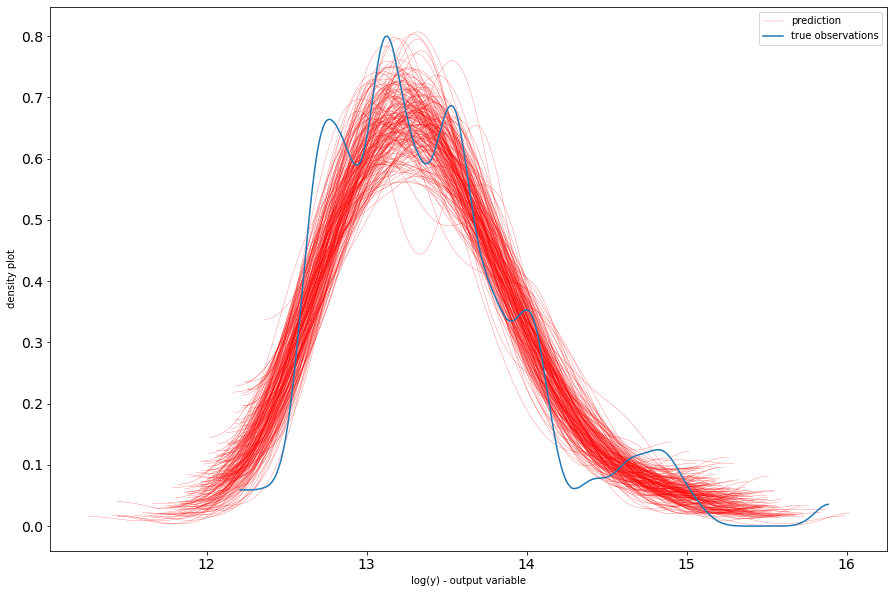

In [128]:
#Simulation
Ypred0 = yscaler0.inverse_transform(ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xn0,  nsamples=200))
for i in range(Ypred0.shape[0]):
    az.plot_dist( Ypred0[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred0[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
az.plot_dist(ylog0,label='true observations');
plt.legend()
plt.rcParams['figure.figsize'] = [25, 20]
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");
plt.rcParams['figure.figsize'] = [15, 10]

## Only Cluster 1

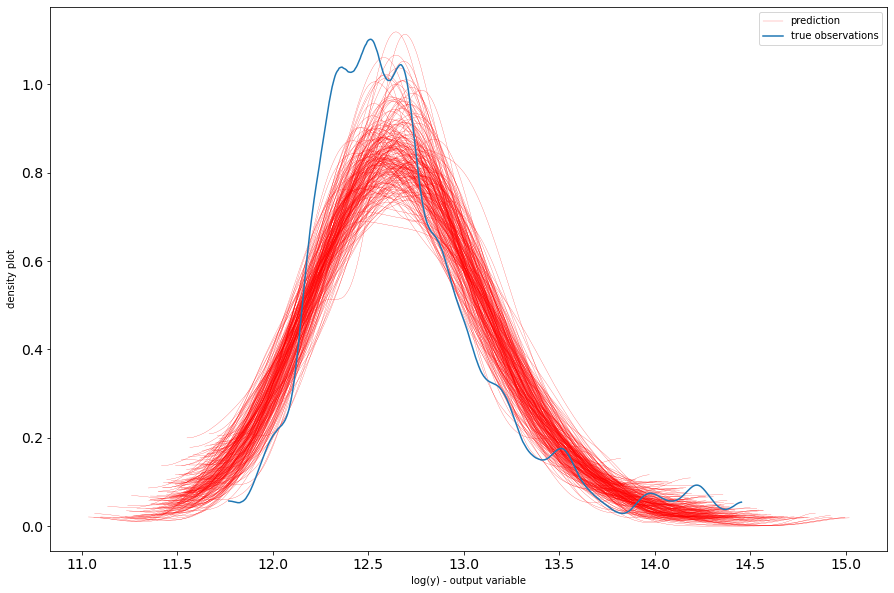

In [127]:
#Simulation
Ypred1 = yscaler1.inverse_transform(ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xn1,  nsamples=200))
for i in range(Ypred1.shape[0]):
    az.plot_dist( Ypred1[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred1[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
az.plot_dist(ylog1,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");
plt.rcParams['figure.figsize'] = [15, 10]

## Only Cluster 2

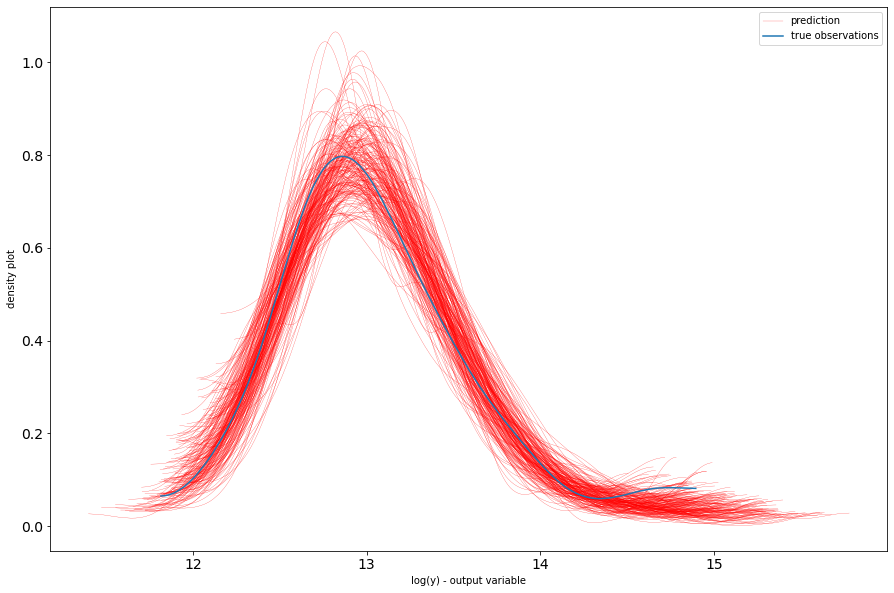

In [126]:
#Simulation
Ypred2 = yscaler2.inverse_transform(ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xn2,  nsamples=200))
for i in range(Ypred2.shape[0]):
    az.plot_dist( Ypred2[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred2[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
az.plot_dist(ylog2,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");
plt.rcParams['figure.figsize'] = [15, 10]

## Only Cluster 3

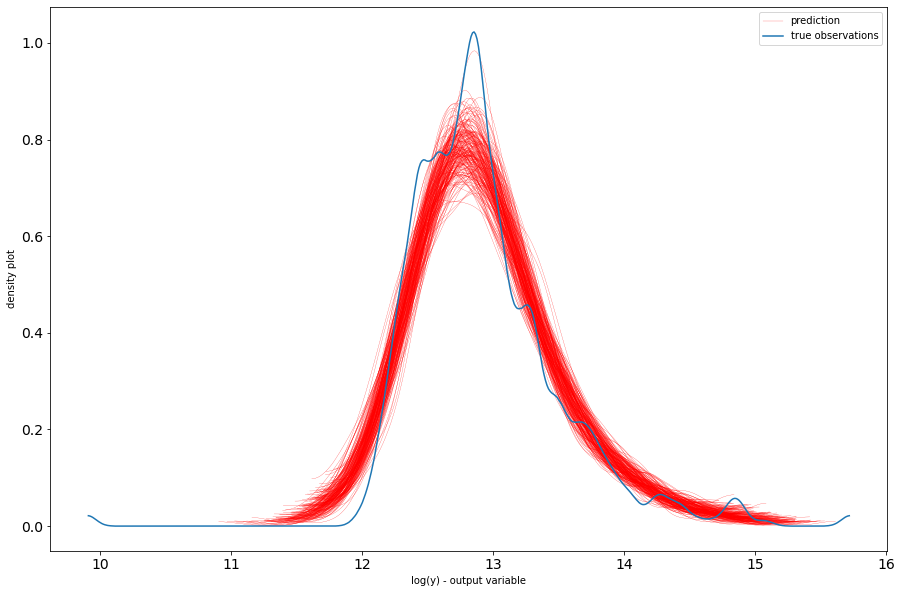

In [125]:
#Simulation
Ypred3 = yscaler3.inverse_transform(ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xn3,  nsamples=200))
for i in range(Ypred3.shape[0]):
    az.plot_dist( Ypred3[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred3[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
az.plot_dist(ylog3,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");
plt.rcParams['figure.figsize'] = [15, 10]

## Only Cluster 4

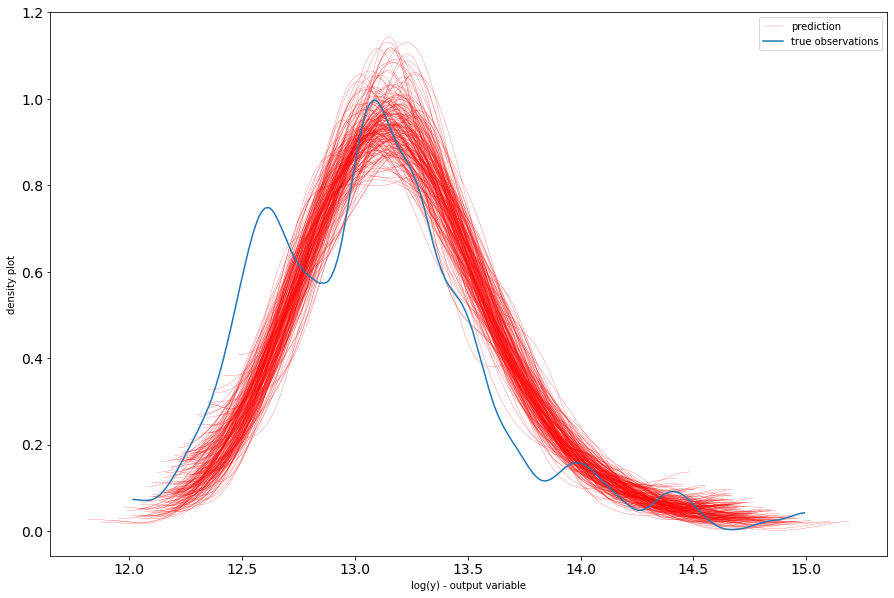

In [124]:
#Simulation
Ypred4 = yscaler4.inverse_transform(ppc(posterior4['alpha'],posterior4['beta'],posterior4['sigma_n'],Xn4,  nsamples=200))
for i in range(Ypred4.shape[0]):
    az.plot_dist( Ypred4[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred4[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
az.plot_dist(ylog4,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");
plt.rcParams['figure.figsize'] = [15, 10]

## Overall

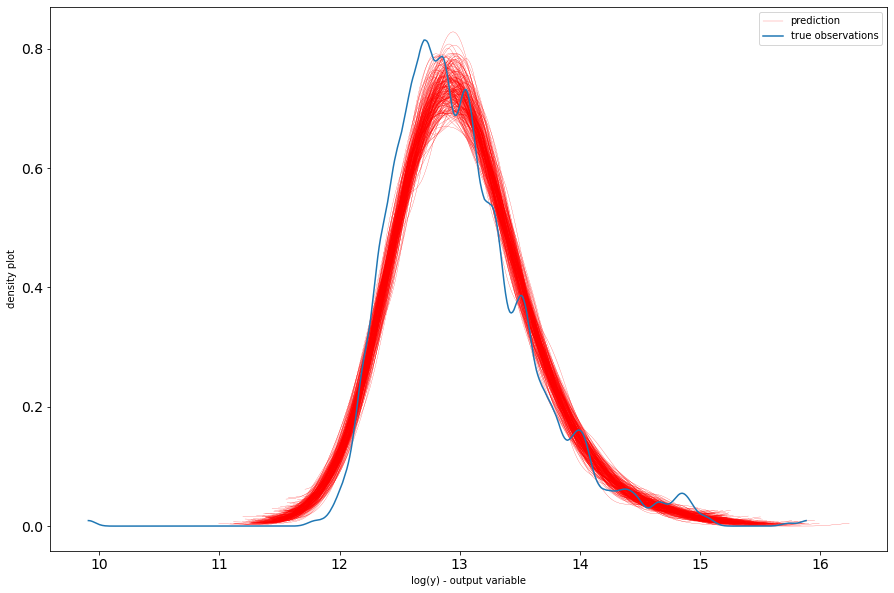

In [123]:
# posteriors
Ypred0 = ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xn0,  nsamples=200)
Ypred1 = ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xn1,  nsamples=200)
Ypred2 = ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xn2,  nsamples=200)
Ypred3 = ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xn3,  nsamples=200)
Ypred4 = ppc(posterior4['alpha'],posterior4['beta'],posterior4['sigma_n'],Xn4,  nsamples=200)

# simulation
Ypred = np.hstack([ yscaler0.inverse_transform(Ypred0),
                 yscaler1.inverse_transform(Ypred1),
                 yscaler2.inverse_transform(Ypred2),
                 yscaler3.inverse_transform(Ypred3),
                 yscaler4.inverse_transform(Ypred4)])

# prediction
for i in range(Ypred.shape[0]):
    az.plot_dist( Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2})

# plot
az.plot_dist(Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
ylog=np.vstack([ylog0,ylog1,ylog2,ylog3, ylog4])
az.plot_dist(ylog,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");
plt.rcParams['figure.figsize'] = [15, 10]

## Test set performance

In [134]:
# cluster 0
y_pred_BLR0 = np.exp(yscaler0.inverse_transform(np.mean(posterior0['alpha']) 
              + np.dot(np.mean(posterior0['beta'],axis=0), Xtestn0.T)))

# cluster 1
y_pred_BLR1 = np.exp(yscaler1.inverse_transform(np.mean(posterior1['alpha']) 
              + np.dot(np.mean(posterior1['beta'],axis=0), Xtestn1.T)))

# cluster 2
y_pred_BLR2 = np.exp(yscaler2.inverse_transform(np.mean(posterior2['alpha']) 
              + np.dot(np.mean(posterior2['beta'],axis=0), Xtestn2.T)))

# cluster 3
y_pred_BLR3 = np.exp(yscaler3.inverse_transform(np.mean(posterior3['alpha']) 
              + np.dot(np.mean(posterior3['beta'],axis=0), Xtestn3.T)))

# cluster 4
y_pred_BLR4 = np.exp(yscaler4.inverse_transform(np.mean(posterior4['alpha']) 
              + np.dot(np.mean(posterior4['beta'],axis=0), Xtestn4.T)))

joint_y_pred=np.hstack([y_pred_BLR0, y_pred_BLR1, y_pred_BLR2, y_pred_BLR3, y_pred_BLR4])

In [136]:
# Save predictions to predictions dataframe (thanks to Rob Barrett for this snippet of code)
df_1 = full_test_predictions
df_2 = pd.DataFrame(joint_y_pred, columns=['Price_Piecewise'])
full_test_predictions = pd.concat([df_1, df_2], axis=1)
full_test_predictions.head(10)


,Index,Price_Full,Price_Piecewise,Price_Piecewise
0,1639.0,378917.576003,423622.396269,423622.396269
1,1640.0,645160.224367,486650.445492,486650.445492
2,1641.0,477133.185937,593765.645780,593765.645780
3,1642.0,823883.173179,257462.115019,257462.115019
4,1643.0,418193.942424,979624.422618,979624.422618
5,1644.0,279435.936620,408040.283686,408040.283686
6,1645.0,256500.344926,440431.199894,440431.199894
7,1646.0,408312.811470,713871.770361,713871.770361
8,1647.0,757664.734204,548730.189408,548730.189408
9,1648.0,770629.924053,481307.563684,481307.563684


## PPC on the Test set

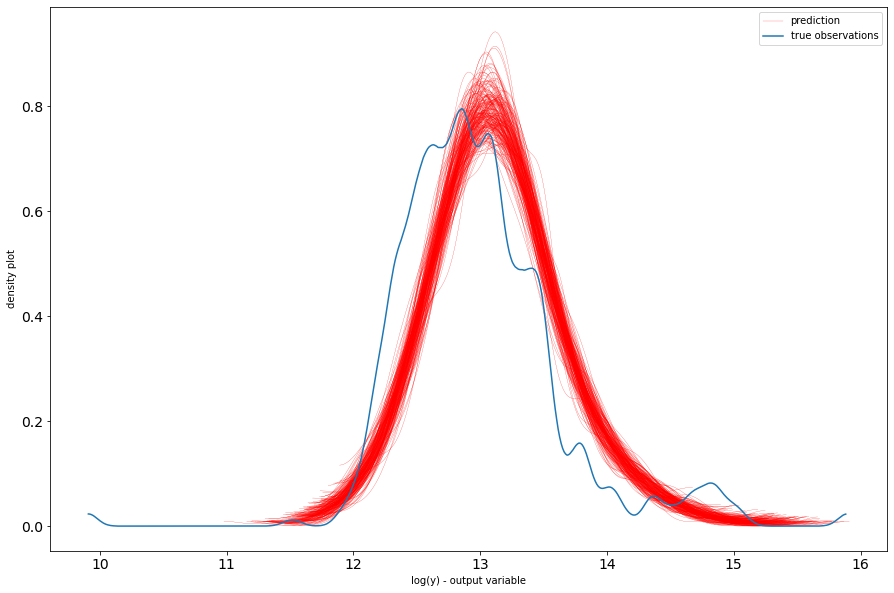

In [122]:
## Posterior predictive checks (PPCs)

num_samples2 = 200
Ypred0 = ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xtestn0, nsamples=num_samples2)
Ypred1 = ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xtestn1, nsamples=num_samples2)
Ypred2 = ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xtestn2, nsamples=num_samples2)
Ypred3 = ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xtestn3, nsamples=num_samples2)
Ypred3 = ppc(posterior4['alpha'],posterior4['beta'],posterior4['sigma_n'],Xtestn4, nsamples=num_samples2)

# Stack arrays in sequence horizontally (column wise)
Ypred = np.hstack([yscaler0.inverse_transform(Ypred0),
                 yscaler1.inverse_transform(Ypred1),
                 yscaler2.inverse_transform(Ypred2),
                 yscaler3.inverse_transform(Ypred3),
                 yscaler4.inverse_transform(Ypred4)])

# plot prediction shape
for i in range(Ypred.shape[0]):
    az.plot_dist( Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2})
# label
az.plot_dist(Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")

# true observations
az.plot_dist(np.log(y_test),label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

# BAYESIAN NN

A [Bayesian network](https://en.wikipedia.org/wiki/Bayesian_network) (also known as a Bayes network, Bayes net, belief network, or decision network) is a probabilistic graphical model that represents a set of variables and their conditional dependencies via a directed acyclic graph (DAG). 

* Bayesian networks are ideal for taking an event that occurred and predicting the likelihood that any one of several possible known causes was the contributing factor. 
* For example, a Bayesian network could represent the probabilistic relationships between diseases and symptoms. 
* Given symptoms, the network can be used to compute the probabilities of the presence of various diseases.

Your comments, explanation, and references here.

In [ ]:
# your code here

# SUMMARY

Your summary here.